<div style="text-align: center"><h1>Assignment 2 - Minh Nguyen</h1></div>

---

# A. Summary Data Analytics

In [1]:
!pip install pandas numpy matplotlib scipy seaborn squarify


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from IPython.display import display, HTML
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import squarify

---

#### A.b. Load the dataset into dataframe and print out the values in the records across all columns

In [3]:
class a_descriptive_implementation:
    def __init__(self):
        self.df_iris_raw = pd.read_csv("./Iris.csv")
        self.df_iris_columns_analysis = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

    def iris_cleaning(self):
        self.df_iris = self.df_iris_raw.dropna()

Summary_Data_Analytics_A_b_Implementation_Read_df_Result = a_descriptive_implementation().df_iris_raw
Summary_Data_Analytics_A_b_Implementation_Read_df_Result

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


---

#### A.c. Descriptive Analysis


##### i. Central Tendency: Mean, Median, and Mode

In [4]:
class central_tendency(a_descriptive_implementation):
    def __init__(self):
        super().__init__()
        super().iris_cleaning()
        
    def mean(self):
        """Calculate the mean of analytics columns."""
        return {col: round(float(self.df_iris[col].mean()),2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def median(self):
        """Calculate the median of analytics columns."""
        return {col: float(self.df_iris[col].median()) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def mode(self):
        """Calculate the mode of analytics columns."""
        return {col: float(self.df_iris[col].mode()[0]) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def histogram_plot(self):
        for column in self.df_iris_columns_analysis:
            uniques_counts = self.df_iris[column].value_counts().sort_index(ascending=True)
            bin_width = (self.df_iris[column].max() - self.df_iris[column].min())/np.sqrt(self.df_iris[column].count())
            bin_edges = np.arange(self.df_iris[column].min(), self.df_iris[column].max() + bin_width, bin_width)
            self.df_iris[f"{column}_Bin"] = np.digitize(self.df_iris[column], bins=bin_edges, right=False)
            uniques_counts, _ = np.histogram(self.df_iris[column], bins=bin_edges)
            bin_labels = [f"{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}" for i in range(len(bin_edges)-1)]
            self.df_iris[f"{column}_Bin_Range"] = self.df_iris[f"{column}_Bin"].apply(lambda x: bin_labels[x-1] if x > 0 and x <= len(bin_labels) else "Out of range")
            plt.figure(figsize=(20, 5))
            plt.bar(range(len(uniques_counts)), uniques_counts, width=0.7, edgecolor='black')
            plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=0, ha='center')
            plt.xlabel(f"{column} Range (cm)")
            plt.ylabel("Frequency")
            plt.title(f"Histogram of {column}")
            plt.grid(axis='y', linestyle='--')
            plt.show()

Metric_Central_Tendency = {
    "Metric": ["Mean", "Median", "Mode"],
}
ct = central_tendency()
for col in ct.df_iris_columns_analysis:
    Metric_Central_Tendency[col] = [
        ct.mean()[col],
        ct.median()[col],
        ct.mode()[col],
    ]

results_df = pd.DataFrame(Metric_Central_Tendency).set_index("Metric")
results_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Metric,,,,
Mean,5.84,3.05,3.76,1.2
Median,5.80,3.00,4.35,1.3
Mode,5.00,3.00,1.50,0.2



##### ii. Measure of Variability: Standard Deviation, Variance, Min/Max Range, and Interquartile Range

In [5]:
class measure_of_variability(a_descriptive_implementation):
    def __init__(self):
        super().__init__()
        super().iris_cleaning()
        
    def standard_deviation(self):
        """Calculate the standard deviation of analytics columns."""
        return {col: round(float(self.df_iris[col].std()), 2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def variance(self):
        """Calculate the variance of analytics columns."""
        return {col: round(float(self.df_iris[col].var()), 2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def min_value(self):
        """Calculate the minimum value of analytics columns."""
        return {col: float(self.df_iris[col].min()) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def max_value(self):
        """Calculate the maximum value of analytics columns."""
        return {col: float(self.df_iris[col].max()) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def range_value(self):
        """Calculate the range (Max - Min) of analytics columns."""
        return {col: round(float(self.df_iris[col].max() - self.df_iris[col].min()),2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def interquartile_range(self):
        """Calculate the interquartile range (IQR) of analytics columns."""
        return {col: round(float(self.df_iris[col].quantile(0.75) - self.df_iris[col].quantile(0.25)),2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}
        
    def percentiles(self):
        """Calculate 0%, 25%, 50%, 75%, 100% percentiles of analytics columns."""
        return {
            col: [
                float(self.df_iris[col].quantile(0.0)),
                float(self.df_iris[col].quantile(0.25)),
                float(self.df_iris[col].quantile(0.50)),
                float(self.df_iris[col].quantile(0.75)),
                float(self.df_iris[col].quantile(1.0)),
            ]
            for col in self.df_iris_columns_analysis if col in self.df_iris.columns
        }

mov = measure_of_variability()
Metric_Measure_Variabilityy = {
    "Metric": ["Standard Deviation", "Variance", "Min", "Max", "Range", "Interquartile Range", "0%", "25%", "50%", "75%", "100%"],
}
percentiles = mov.percentiles()
for col in mov.df_iris_columns_analysis:
    Metric_Measure_Variabilityy[col] = [
        mov.standard_deviation()[col],
        mov.variance()[col],
        mov.min_value()[col],
        mov.max_value()[col],
        mov.range_value()[col],
        mov.interquartile_range()[col],
        percentiles[col][0],
        percentiles[col][1],
        percentiles[col][2],
        percentiles[col][3],
        percentiles[col][4]
    ]
results_df = pd.DataFrame(Metric_Measure_Variabilityy).set_index("Metric")
results_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Metric,,,,
Standard Deviation,0.83,0.43,1.76,0.76
Variance,0.69,0.19,3.11,0.58
Min,4.30,2.00,1.00,0.10
Max,7.90,4.40,6.90,2.50
Range,3.60,2.40,5.90,2.40
Interquartile Range,1.30,0.50,3.50,1.50
0%,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30



##### iii. Distribution Shape: Skewness and Kurtosis

In [6]:
class distribution_shape(a_descriptive_implementation):
    def __init__(self):
        super().__init__()
        super().iris_cleaning()
        
    def kurtosis(self):
        """Calculate the kurtosis of analytics columns."""
        return {col: round(float(stats.kurtosis(self.df_iris[col], fisher=False)), 2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

    def skewness(self):
        """Calculate the skewness of analytics columns."""
        return {col: round(float(stats.skew(self.df_iris[col])), 2) for col in self.df_iris_columns_analysis if col in self.df_iris.columns}

distribution_metrics = distribution_shape()
Metrics_Distribution_Shape = {
    "Metric": ["Kurtosis", "Skewness"]
}

for col in distribution_metrics.df_iris_columns_analysis:
    Metrics_Distribution_Shape[col] = [
        distribution_metrics.kurtosis()[col],
        distribution_metrics.skewness()[col]
    ]

results_distribution_df = pd.DataFrame(Metrics_Distribution_Shape).set_index("Metric")
results_distribution_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Metric,,,,
Kurtosis,2.43,3.24,1.60,1.66
Skewness,0.31,0.33,-0.27,-0.10


---

**Summary Descriptive Analytics**

**1. Sepal Length (SepalLengthCm)**
- Skewness: Positive skewed
- Kurtosis: Near normal
- Mean (5.84) > Median (5.80) > Mode (5.00) → Positive skewed
- The distribution of Sepal Length illutrated a slightly positive skew, that while most values are concentrated around the mean, there is a slight tail extending towards higher values. This indicates that while smaller sepal lengths are more common inside dataset, there are a few larger values that pull the mean slightly above the median. The kurtosis value of 2.43 also shows a shape close to normal, that while some extreme values exist, they do not dominate the distribution. And with the range (3.60) and interquartile range (1.30) also indicate a moderate spread of data and supporting the notion that variations in Sepal Length are present but not extreme.

**2. Sepal Width (SepalWidthCm)**
- Skewness: Positive skewed
- Kurtosis: More peaked than normal
- Mean (3.05) > Median (3.00) = Mode (3.00) → Positive skewed
- Sepal Width shows us a slightly positive skew that while the data is relatively symmetric, there are a few larger values extending the right tail. This is reflected in the mean being slightly higher than the median, indicating that the distribution is not perfectly balanced but remains close to normal. The kurtosis value of 3.24 is higher than normal, suggesting that the distribution is more peaked, meaning most values are concentrated near the central point with fewer extreme values in both tails. The relatively smaller range is 2.40 and interquartile range is 0.50 also indicate that Sepal Width measurements are less variable compared to other attributes.

**3. Petal Length (PetalLengthCm)**
- Skewness: Negative skewed
- Kurtosis: Flatter than normal
- Mean (3.76) < Median (4.35) > Mode (1.50) → Negative skewed
- The distribution of Petal Length is negative skewed illutrated that there is a concentration of higher values, while a smaller number of lower values extend the left tail. We can know also from the mean being lower than the median, indicating that extreme small values are pulling the average down. The mode (1.50) being significantly lower than the median suggests the presence of a distinct lower subgroup and the kurtosis of 1.60 is lower than normal, implying a flatter distribution where values are more widely dispersed rather than concentrated around the mean. Moreover, the large range (5.90) and interquartile range (3.50) also shows that Petal Length varies significantly inside the dataset.

**4. Petal Width (PetalWidthCm)**
- Skewness: Normal skewed
- Kurtosis: Flatter than normal
- Mean (1.20) ≈ Median (1.30) > Mode (0.20) → Normal skewed
- Petal Width is approximately normal skewed, the distribution of Petal Width is nearly symmetric with a balanced number of values on both sides of the mean. The slight deviation, where the mean is marginally lower than the median (0.1), is not strong enough to indicate a notable skew in either direction and besides, the kurtosis value of 1.66 suggests a flatter-than-normal distribution, indicating a wider spread of values rather than a strong concentration near the center. The presence of Petal Width has a low mode is 0.20 suggests that while most values are distributed normally, a smaller subgroup with very low Petal Width values still exists and this could be indicative of distinct species groups within the dataset. The interquartile range (1.50) illutrated moderate variability, aligning with its flatter-than-normal shape.

---

# B, Data Visualizations

---

#### B.b. Load the dataset into dataframe and print out the values in the records across all columns

In [7]:
class B_Visualizations_Implementation:
    def __init__(self):
        self.df_netflix_raw = pd.read_csv("./netflix_titles.csv")

    def netflix_cleaning(self):
        self.df_netflix = self.df_netflix_raw.dropna(subset=["type","title","country", "release_year"])

Data_Visualizations_B_b_Implementation_Netflix_df_Result = B_Visualizations_Implementation().df_netflix_raw
Data_Visualizations_B_b_Implementation_Netflix_df_Result

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


---

#### B.c. Create an effective text visualization to demonstrate the percentages of “Movie” versus “TV Show” from the type column

In [8]:
class visualization_text_movies_tv_shows(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
        
    def visualization_text_movies_tv_shows_implementation(self):
        type_counts = self.df_netflix['type'].value_counts(normalize=True) * 100
        for type_name, percent in type_counts.items():
            if type_name == "Movie" and "TV Show" in type_counts:
                html_content = f"""
                <div style="display: flex; align-items: center; justify-content: center;">
                    <div style="font-family: Arial, sans-serif;
                                text-align: center;
                                border-radius: 4px;
                                border-width: 3px;
                                border-style: solid;
                                border-color: black;
                                padding: 10px;
                                width:350px">
                            <span style="font-size: 70px;
                                      color: green;
                                      font-weight: bold;">
                                      {percent:.0f}%
                            </span><br>
                            <span style="font-size: 20px; color: gray;">of people preferred</span>
                            <a style="font-size: 20px; color: green; text-decoration: none; font-weight: bold;">{type_name}</a><br>
                            <span style="font-size: 20px; color: gray;">compared to
                                <a style="font-size: 20px; color: blue; text-decoration: none; font-weight: bold;">
                                    {type_counts["TV Show"]:.0f}%
                                </a>
                                who preferred
                                <a style="color: blue; font-weight: bold;">
                                    TV Show
                                </a>
                            </span>
                    </div>
                </div>
                """
                display(HTML(html_content))

Data_Visualizations_B_c_Implementation_Text = visualization_text_movies_tv_shows()
Data_Visualizations_B_c_Implementation_Text.visualization_text_movies_tv_shows_implementation()

---

#### B.d. Create a vertical bar chart showing the total number of releases for the top 10 countries.

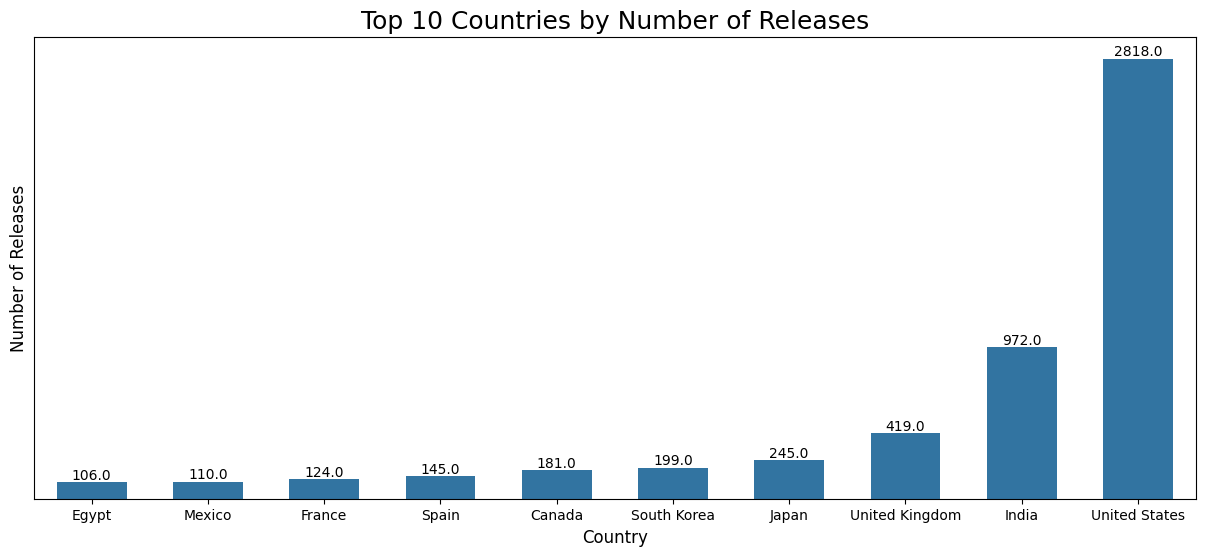

In [9]:
class visualization_bar_chart_verical_top_10_countries_most_releases(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
        
    def visualize_vertical_bar_graph_10_top_countries(self):
        country_counts = self.df_netflix['country'].value_counts().nlargest(10).sort_values(ascending=True)
        
        plt.figure(figsize=(15,6))
        ax = sns.barplot(x=country_counts.index, y=country_counts.values, width=0.6)
        plt.xlabel("Country", fontsize=12)
        plt.ylabel("Number of Releases", fontsize=12)
        plt.title("Top 10 Countries by Number of Releases", fontsize=18)
        plt.xticks(rotation=0, ha='center', fontsize=10)
        plt.yticks([])
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
        plt.show()

Data_Visualizations_B_c_Implementation_Vertical_Bar_Graph_Top_10_Countries_Most_Releases = visualization_bar_chart_verical_top_10_countries_most_releases()
Data_Visualizations_B_c_Implementation_Vertical_Bar_Graph_Top_10_Countries_Most_Releases.visualize_vertical_bar_graph_10_top_countries()

---

#### B.e. Create a line graph showing the total number of releases for the top 10 countries from 2017-2021. (2 marks).

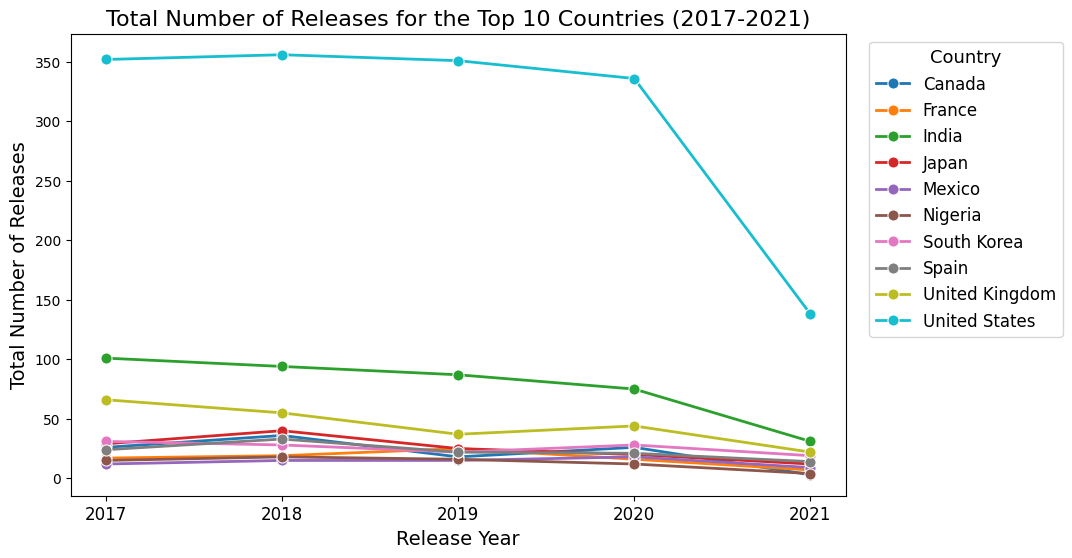

In [10]:
class visualization_line_chart_top_10_countries_most_releases_in_time_range(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
    def visualize_line_graph_10_top_countries_releases_over_time(self):
        df_filtered = self.df_netflix[self.df_netflix["release_year"].between(2017, 2021)]
        df_filtered = df_filtered.sort_values(ascending=True, by="release_year")
        
        top_10_countries = df_filtered["country"].value_counts().nlargest(10).index
        df_top_countries = df_filtered[df_filtered["country"].isin(top_10_countries)]
        
        df_grouped = df_top_countries.groupby(["release_year", "country"]).size().reset_index(name="total_releases")
        
        plt.figure(figsize=(10,6))
        sns.lineplot(data=df_grouped, x="release_year", y="total_releases", hue="country", marker="o", palette="tab10", linewidth=2, markersize=8)
        plt.xlabel("Release Year", fontsize=14)
        plt.ylabel("Total Number of Releases", fontsize=14)
        plt.xticks(np.arange(df_grouped["release_year"].min(), df_grouped["release_year"].max() + 1, 1), fontsize=12)
        plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=12, title_fontsize=13)
        plt.title("Total Number of Releases for the Top 10 Countries (2017-2021)", fontsize=16)
        plt.show()

visualization_line_chart_top_10_countries_most_releases_in_time_range_b_e = visualization_line_chart_top_10_countries_most_releases_in_time_range()
visualization_line_chart_top_10_countries_most_releases_in_time_range_b_e.visualize_line_graph_10_top_countries_releases_over_time()

---

#### B.f. Create a horizontal stacked bar chart showing the breakdown of “Movie” versus “TV Show” for the top 10 countries. (3 marks).

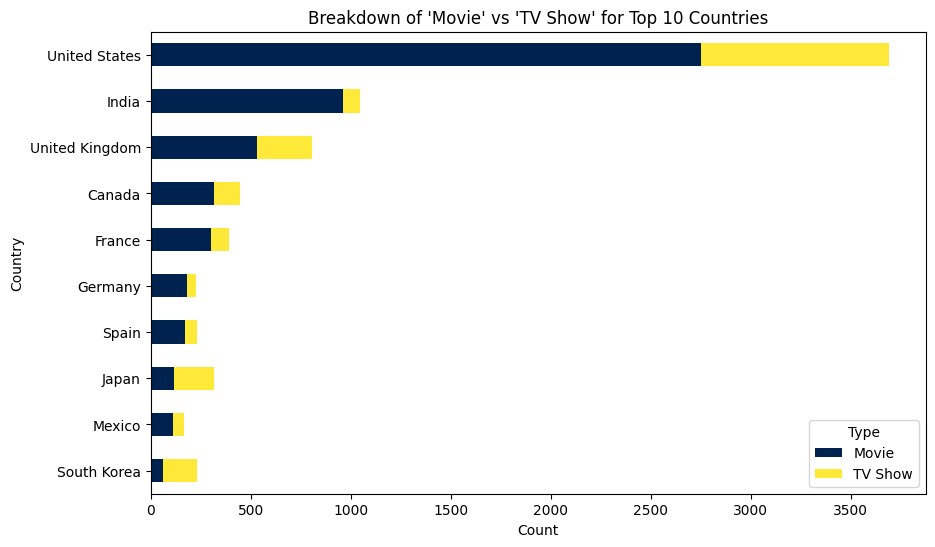

In [11]:
class visualization_horizontal_stacked_bar_chart_top_10_countries_in_movies_and_tv_shows(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
    def visualize_horizontal_stacked_bar_chart_top_10_countries_in_movies_and_tv_shows_implementation(self):
        self.df_netflix = self.df_netflix.dropna(subset=['country', 'type'])
        df_exploded = self.df_netflix.assign(country=self.df_netflix['country'].str.split(', ')).explode('country')
        
        top_countries = df_exploded['country'].value_counts().head(10).index
        df_top_countries = df_exploded[df_exploded['country'].isin(top_countries)]
        
        df_pivot = df_top_countries.pivot_table(index='country', columns='type', aggfunc='size', fill_value=0)
        df_pivot = df_pivot.sort_values(by=df_pivot.columns.tolist(), ascending=True)
        ax = df_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='cividis')
        plt.xlabel("Count")
        plt.ylabel("Country")
        plt.title("Breakdown of 'Movie' vs 'TV Show' for Top 10 Countries")
        plt.legend(title="Type")
        plt.show()

visualization_horizontal_stacked_bar_chart_top_10_countries_most_releases_in_movies_tv_shows_b_f = visualization_horizontal_stacked_bar_chart_top_10_countries_in_movies_and_tv_shows()
visualization_horizontal_stacked_bar_chart_top_10_countries_most_releases_in_movies_tv_shows_b_f.visualize_horizontal_stacked_bar_chart_top_10_countries_in_movies_and_tv_shows_implementation()

---

#### B.g. Create another visualization that you feel is effective for communicating some other aspect of the dataset

##### Top 10 Most Frequent Directors on Netflix

C:\Users\NolanM\AppData\Local\Temp\ipykernel_13576\1220742306.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="cividis")


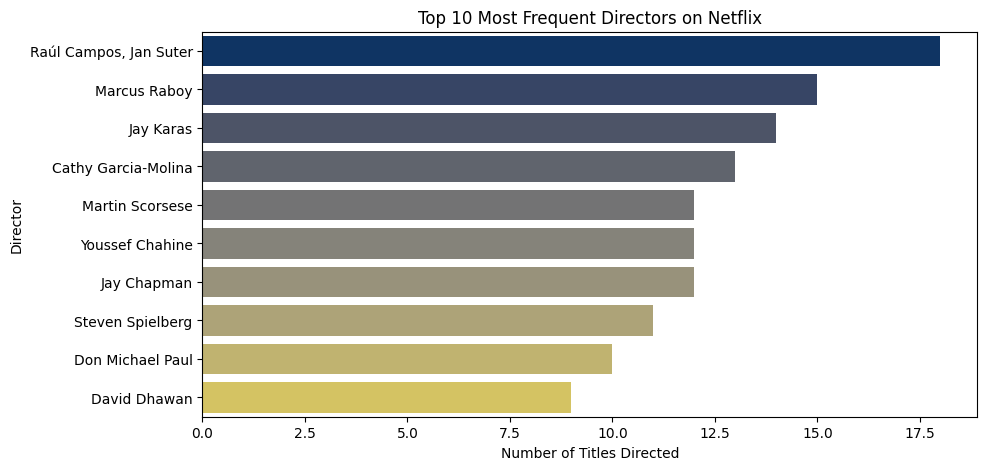

In [12]:
class Visualization_Top_10_Directors(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
    
    def visualize_top_10_directors_implementation(self):
        self.df_netflix = self.df_netflix.dropna(subset=['director'])
        top_directors = self.df_netflix['director'].value_counts().head(10)
        
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_directors.values, y=top_directors.index, palette="cividis")
        plt.title("Top 10 Most Frequent Directors on Netflix")
        plt.xlabel("Number of Titles Directed")
        plt.ylabel("Director")
        plt.show()

visualization_Top_10_Directors = Visualization_Top_10_Directors()
visualization_Top_10_Directors.visualize_top_10_directors_implementation()

##### Top 10 Most Frequent Cast Members on Netflix

C:\Users\NolanM\AppData\Local\Temp\ipykernel_13576\1072604702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="cividis")


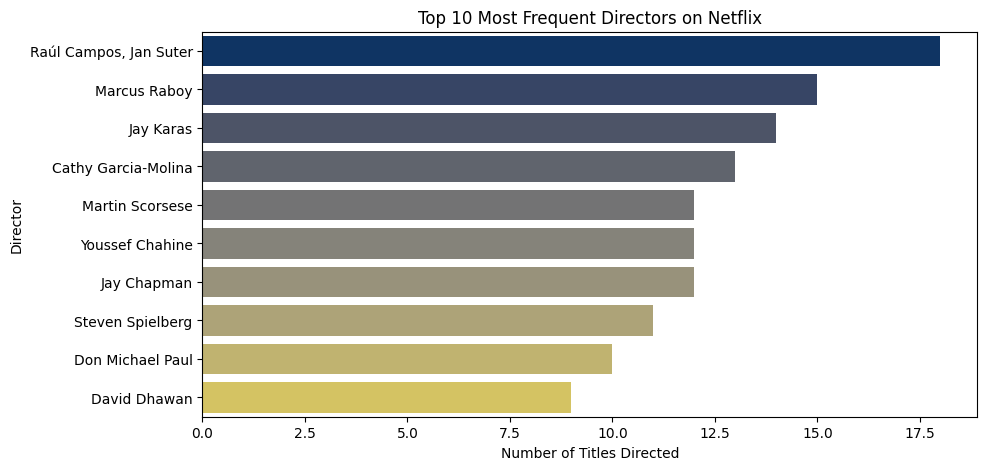

In [13]:
class Visualization_Top_10_Cast_Members(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
    
    def visualize_top_10_cast_members_implementation(self):
        self.df_netflix = self.df_netflix.dropna(subset=['director'])
        top_directors = self.df_netflix['director'].value_counts().head(10)
        
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_directors.values, y=top_directors.index, palette="cividis")
        plt.title("Top 10 Most Frequent Directors on Netflix")
        plt.xlabel("Number of Titles Directed")
        plt.ylabel("Director")
        plt.show()

visualization_Top_10_Cast_Members = Visualization_Top_10_Cast_Members()
visualization_Top_10_Cast_Members.visualize_top_10_cast_members_implementation()

##### Distribution of Movie Durations on Netflix

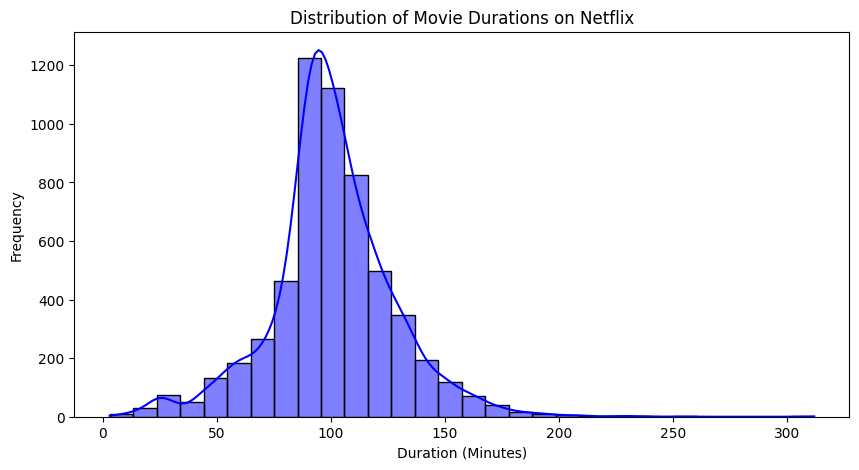

In [14]:
class Visualization_Movie_Duration_Distribution(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
    
    def Visualization_Movie_Duration_Distribution_implementation(self):
        df_movies = self.df_netflix[self.df_netflix["type"] == "Movie"].dropna(subset=["duration"])
        df_movies["duration"] = df_movies["duration"].str.replace(" min", "").astype(int)
        
        plt.figure(figsize=(10, 5))
        sns.histplot(df_movies["duration"], bins=30, kde=True, color="blue")
        plt.title("Distribution of Movie Durations on Netflix")
        plt.xlabel("Duration (Minutes)")
        plt.ylabel("Frequency")
        plt.show()

visualization_Movie_Duration_Distribution = Visualization_Movie_Duration_Distribution()
visualization_Movie_Duration_Distribution.Visualization_Movie_Duration_Distribution_implementation()

##### Netflix Titles Distribution by Continent (Bar Graph)

C:\Users\NolanM\AppData\Local\Temp\ipykernel_13576\4253092616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_netflix["country"] = self.df_netflix["country"].str.strip()


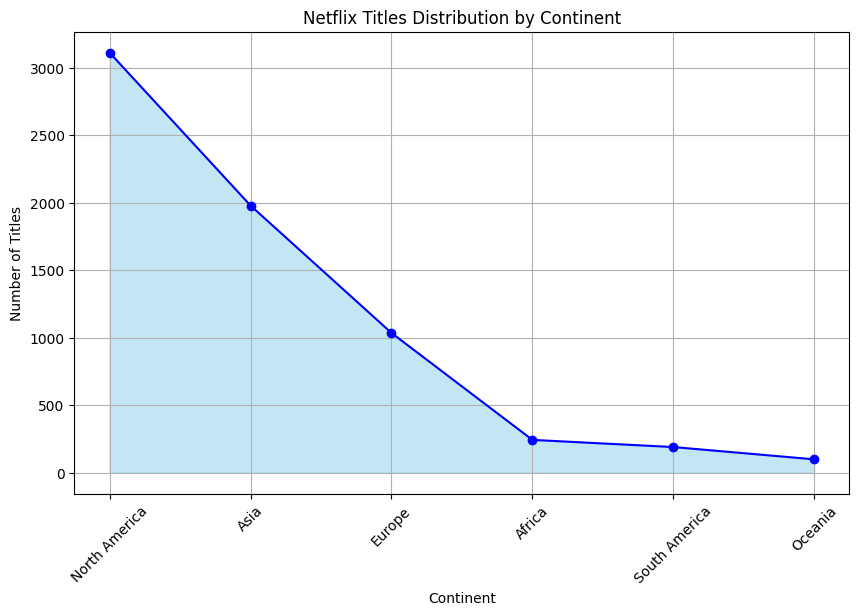

In [15]:
class Visualization_titles_distribution_by_continent(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
        github_url = "https://raw.githubusercontent.com/NolanMM/PROG74010---25W-Sec1-Data-Visualization/main/Assignments/Assignment_2/Countries%20by%20continents.csv"
        self.countries_df = pd.read_csv(github_url)
    
    def Visualization_titles_distribution_by_continent_implementation(self):
        self.df_netflix["country"] = self.df_netflix["country"].str.strip()
        self.countries_df["country"] = self.countries_df["Country"].str.strip()
        merged_df = self.df_netflix.merge(self.countries_df, on="country", how="left").dropna(subset=["Continent"])
        continent_counts = merged_df["Continent"].value_counts()
        
        plt.figure(figsize=(10, 6))
        plt.fill_between(continent_counts.index, continent_counts.values, color="skyblue", alpha=0.5)
        plt.plot(continent_counts.index, continent_counts.values, marker="o", color="blue")
        plt.xlabel("Continent")
        plt.ylabel("Number of Titles")
        plt.title("Netflix Titles Distribution by Continent")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

visualization_titles_distribution_by_continent = Visualization_titles_distribution_by_continent()
visualization_titles_distribution_by_continent.Visualization_titles_distribution_by_continent_implementation()

##### Top 3 Continents with Most Netflix Titles (Area Graph)

C:\Users\NolanM\AppData\Local\Temp\ipykernel_13576\1837086764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_netflix["country"] = self.df_netflix["country"].str.strip()


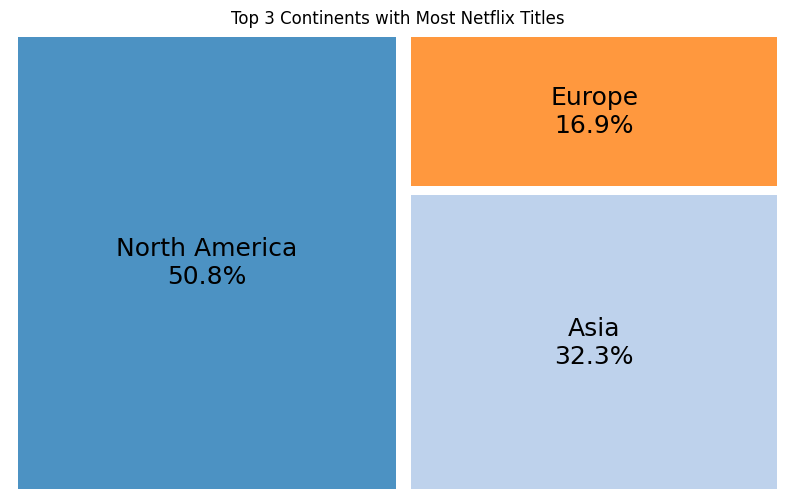

In [16]:
class Visualization_Top_3_Titles_Distribution_by_Continent(B_Visualizations_Implementation):
    def __init__(self):
        super().__init__()
        super().netflix_cleaning()
        github_url = "https://raw.githubusercontent.com/NolanMM/PROG74010---25W-Sec1-Data-Visualization/main/Assignments/Assignment_2/Countries%20by%20continents.csv"
        self.countries_df = pd.read_csv(github_url)
    
    def Visualization_Top_3_Titles_Distribution_by_Continent_implementation(self):
        self.df_netflix["country"] = self.df_netflix["country"].str.strip()
        self.countries_df["country"] = self.countries_df["Country"].str.strip()
        merged_df = self.df_netflix.merge(self.countries_df, on="country", how="left").dropna(subset=["Continent"])
        continent_counts = merged_df["Continent"].value_counts().nlargest(3)
        total = continent_counts.sum()
        labels = [f"{index}\n{value / total * 100:.1f}%" for index, value in zip(continent_counts.index, continent_counts.values)]
        
        plt.figure(figsize=(10, 6))
        squarify.plot(sizes=continent_counts.values, label=labels, alpha=0.8, pad=True, text_kwargs={'fontsize': 18}, color=sns.color_palette("tab20", len(continent_counts)))
        plt.title("Top 3 Continents with Most Netflix Titles")
        plt.axis("off")
        plt.show()

visualization_Top_3_Titles_Distribution_by_Continent = Visualization_Top_3_Titles_Distribution_by_Continent()
visualization_Top_3_Titles_Distribution_by_Continent.Visualization_Top_3_Titles_Distribution_by_Continent_implementation()